In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Part A

In [3]:
iris_df = pd.read_csv('Iris.csv', index_col=0)
iris_df

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2
...,...,...,...,...,...
145,3,67,30,52,23
146,3,63,25,50,19
147,3,65,30,52,20
148,3,62,34,54,23


In [36]:
iris_df.loc[:, iris_df.columns != 'Class'] = StandardScaler().fit_transform(iris_df.loc[:, iris_df.columns != 'Class'])

In [37]:
# train_df, test_df = train_test_split(iris_df, test_size=0.2)
X_train = train_df.loc[:, train_df.columns != 'Class']
Y_train = train_df['Class']
X_test = test_df.loc[:, test_df.columns != 'Class']
Y_test = test_df['Class']


In [38]:
kdtree_accuracies = []
kdtree_errors = []

for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree').fit(X_train, Y_train)    
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    kdtree_accuracies.append(accuracy)
    kdtree_errors.append(error)

kdtree_accuracies = np.array(kdtree_accuracies)
kdtree_errors = np.array(kdtree_errors)

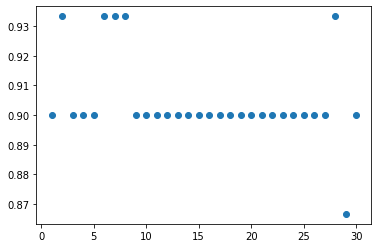

In [39]:
plt.scatter(np.arange(1,31),kdtree_accuracies)

Text(0, 0.5, 'KNN with KDTree error')

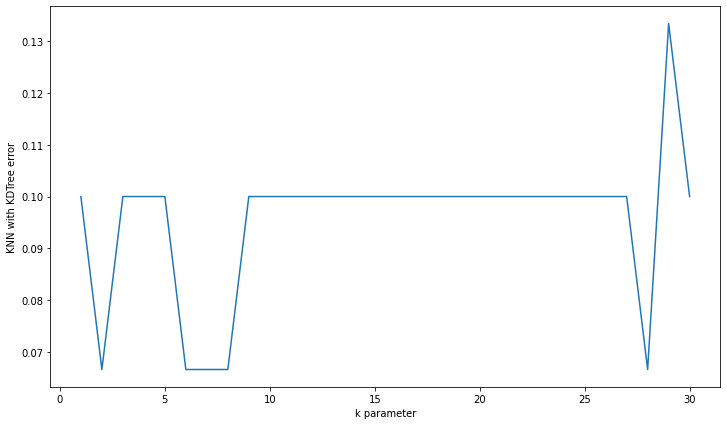

In [40]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors
)
fig.set_size_inches((12, 7))
plt.xlabel("k parameter")
plt.ylabel("KNN with KDTree error")

In [41]:
print(f'First Best Error: {kdtree_errors.min()} at K: {kdtree_errors.argmin() + 1}')

First Best Error: 0.06666666666666665 at K: 2


0.9333333333333333


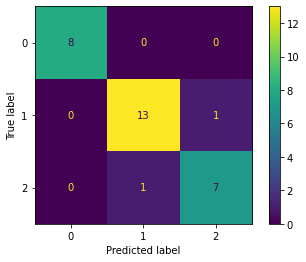

In [42]:
best_classifier = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree').fit(X_train, Y_train)
# best_classifier = KNeighborsClassifier(n_neighbors=kdtree_errors.argmin()+1, algorithm='kd_tree').fit(X_train, Y_train)

y_test_kdtree = best_classifier.predict(X_test)
score = best_classifier.score(X_test, Y_test)
print(score)

cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

### Part B

In [43]:
balltree_accuracies = []
balltree_errors = []
verbose=0

for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    balltree_accuracies.append(accuracy)
    balltree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
balltree_accuracies = np.array(balltree_accuracies)
balltree_errors = np.array(balltree_errors)

Text(0, 0.5, 'KNN with BallTree error')

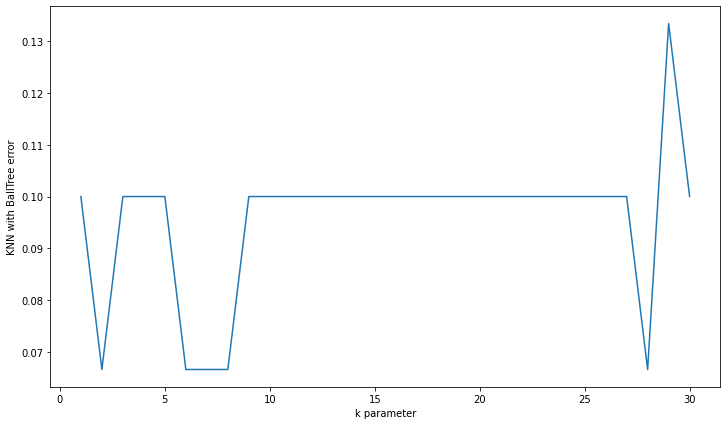

In [44]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    balltree_errors,
)
fig.set_size_inches((12, 7))
plt.xlabel("k parameter")
plt.ylabel("KNN with BallTree error")

In [45]:
print(f'First Best Error: {balltree_errors.min()} at K: {balltree_errors.argmin() + 1}')

First Best Error: 0.06666666666666665 at K: 2


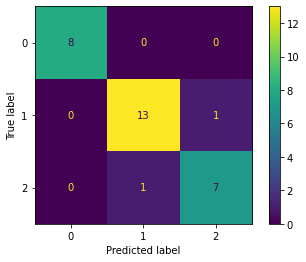

In [46]:
best_classifier = KNeighborsClassifier(n_neighbors=balltree_errors.argmin()+1, algorithm='ball_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

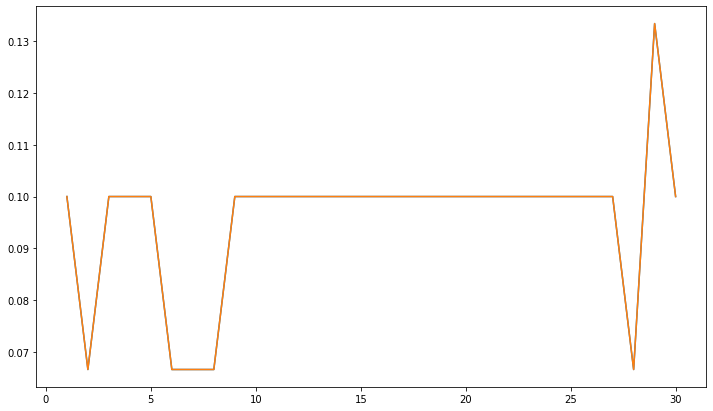

In [47]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors,
    label = 'KDTree'
)
ax.plot(
    np.arange(1, 31),
    balltree_errors,
    label = 'BallTree'
)
fig.set_size_inches((12, 7))

### Result:
they both give same result in errors.